In [1]:
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

# set maximum display rows as 200
pd.set_option('display.max_rows', 200)

plt.style.use('ggplot') # use ggplot styling
# displays graphs in the notebook
%matplotlib inline

In [2]:
df = pd.read_sql_table('display', 'sqlite:///dissertation.db') 

In [3]:
df_copy = df.copy()
df_copy

,time,mean_power,weekofyear,day_name,hour,mins,day_type,kWh
0,2019-12-23 00:00:00,21.0,-1,0,0,0,weekday,0.000058
1,2019-12-23 00:00:10,21.0,-1,0,0,0,weekday,0.000058
2,2019-12-23 00:00:20,21.0,-1,0,0,0,weekday,0.000058
3,2019-12-23 00:00:30,21.0,-1,0,0,0,weekday,0.000058
4,2019-12-23 00:00:40,21.0,-1,0,0,0,weekday,0.000058
...,...,...,...,...,...,...,...,...
1451515,2020-06-07 23:59:10,58.0,23,6,23,59,holiday,0.000161
1451516,2020-06-07 23:59:20,58.0,23,6,23,59,holiday,0.000161
1451517,2020-06-07 23:59:30,57.5,23,6,23,59,holiday,0.000160
1451518,2020-06-07 23:59:40,57.0,23,6,23,59,holiday,0.000158


In [49]:
week = pd.DataFrame({'Week_kWh' : (df_copy.groupby( ['weekofyear'])['kWh'].sum())}).reset_index()
day = pd.DataFrame({'day_kWh' : (df_copy.groupby( ['day_name'])['kWh'].sum()/24)}).reset_index()
hour = pd.DataFrame({'hour_kWh' : (df_copy.groupby( ['hour'])['kWh'].sum()/24)}).reset_index()

In [50]:
week.describe()

,weekofyear,Week_kWh
count,24.000000,24.000000
mean,11.458333,6.393328
std,7.144345,4.434752
min,-1.000000,0.000000
25%,5.750000,2.293811
50%,11.500000,6.638052
75%,17.250000,10.788119
max,23.000000,10.942932


In [51]:
day

,day_name,day_kWh
0,0,0.820056
1,1,0.896756
2,2,1.087836
3,3,0.968164
4,4,0.919171
5,5,0.851295
6,6,0.850049


In [10]:
hour

,hour,hour_kWh
0,0,0.228110
1,1,0.226431
2,2,0.226727
3,3,0.225986
4,4,0.228731
5,5,0.241433
6,6,0.261657
7,7,0.270311
8,8,0.271312
9,9,0.272793


In [11]:
hour['hour_kWh'][0:7].sum()

1.6390756944442524

In [12]:
hour['hour_kWh'][22:].sum()

0.4592829861109904

## Clustering Starts from Here

In [28]:
df_clustering =pd.read_sql_table('display_tsfel', 'sqlite:///dissertation.db')

In [29]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     140 non-null    int64  
 1   0_Absolute energy         140 non-null    float64
 2   0_Mean                    140 non-null    float64
 3   0_Max                     140 non-null    float64
 4   0_Standard deviation      140 non-null    float64
 5   0_FFT mean coefficient_0  140 non-null    float64
 6   0_Spectral kurtosis       140 non-null    float64
 7   0_Skewness                140 non-null    float64
 8   0_Zero crossing rate      140 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.0 KB


In [30]:
df_clustering['time'] = pd.date_range(start="12/23/2019", end="05/10/2020", freq='D')

In [31]:
# prepare data for clustering
df_clustering['weekofyear']=df_clustering['time'].dt.week
df_clustering['day_categ']=df_clustering['time'].dt.day_name()
df_clustering['day_num']=df_clustering['time'].dt.weekday
df_clustering['day']=df_clustering['time'].dt.day


df_clustering['day_type'] = df_clustering['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_clustering.loc[(df_clustering.time >= '2019-12-24') & (df_clustering.time < '2019-12-26'), 'day_type']='holiday' #christmas
df_clustering.loc[(df_clustering.time == '2020-01-01'), 'day_type']='holiday' #new year
# lockdown week 13
df_clustering.loc[(df_clustering.weekofyear >12) & (df_clustering.weekofyear <25), 'day_type'] = 'holiday'

In [32]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     140 non-null    int64         
 1   0_Absolute energy         140 non-null    float64       
 2   0_Mean                    140 non-null    float64       
 3   0_Max                     140 non-null    float64       
 4   0_Standard deviation      140 non-null    float64       
 5   0_FFT mean coefficient_0  140 non-null    float64       
 6   0_Spectral kurtosis       140 non-null    float64       
 7   0_Skewness                140 non-null    float64       
 8   0_Zero crossing rate      140 non-null    float64       
 9   time                      140 non-null    datetime64[ns]
 10  weekofyear                140 non-null    int64         
 11  day_categ                 140 non-null    object        
 12  day_num               

In [33]:
df_clustering_ok=df_clustering.drop(['index','weekofyear','time','day','day_num'],axis=1)
df_clustering_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   0_Zero crossing rate      140 non-null    float64
 8   day_categ                 140 non-null    object 
 9   day_type                  140 non-null    object 
dtypes: float64(8), object(2)
memory usage: 11.1+ KB


In [34]:
df_dum = pd.get_dummies(df_clustering_ok)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   0_Zero crossing rate      140 non-null    float64
 8   day_categ_Friday          140 non-null    uint8  
 9   day_categ_Monday          140 non-null    uint8  
 10  day_categ_Saturday        140 non-null    uint8  
 11  day_categ_Sunday          140 non-null    uint8  
 12  day_categ_Thursday        140 non-null    uint8  
 13  day_categ_Tuesday         140 non-null    uint8  
 14  day_categ_

In [35]:
df_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ_Friday,day_categ_Monday,day_categ_Saturday,day_categ_Sunday,day_categ_Thursday,day_categ_Tuesday,day_categ_Wednesday,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.997847,0.641959,-0.047614,-0.182755,0.919787,-0.277616,-0.600254,0.011874,-0.066920,-0.049370,-0.051566,0.040605,-0.006449,0.121828,0.776025,-0.453273,-0.385247
0_Mean,0.997847,1.000000,0.639718,-0.047505,-0.190451,0.914594,-0.278486,-0.588808,0.004258,-0.068730,-0.044926,-0.046380,0.040672,-0.012835,0.127942,0.760856,-0.449445,-0.371289
0_Max,0.641959,0.639718,1.000000,0.652484,0.432911,0.470272,-0.121482,-0.159039,0.107313,-0.042363,-0.188914,-0.190164,0.082940,0.099189,0.131999,0.291633,0.083194,-0.468626
0_Standard deviation,-0.047614,-0.047505,0.652484,1.000000,0.727795,-0.254626,-0.058033,0.316204,0.104628,-0.020180,-0.212498,-0.215048,0.105021,0.150951,0.087125,-0.339573,0.548715,-0.278965
0_FFT mean coefficient_0,-0.182755,-0.190451,0.432911,0.727795,1.000000,-0.334766,0.008367,0.364230,0.251500,-0.083964,-0.135936,-0.134686,0.034739,0.032586,0.035760,-0.369247,0.452454,-0.119136
0_Spectral kurtosis,0.919787,0.914594,0.470272,-0.254626,-0.334766,1.000000,-0.217178,-0.563240,-0.000464,-0.053386,0.008821,0.023628,0.003233,-0.029620,0.047786,0.829159,-0.583094,-0.285442
0_Skewness,-0.277616,-0.278486,-0.121482,-0.058033,0.008367,-0.217178,1.000000,0.162689,-0.029450,0.001404,-0.022219,-0.032856,0.136130,-0.007394,-0.045614,-0.190508,0.163969,0.027268
0_Zero crossing rate,-0.600254,-0.588808,-0.159039,0.316204,0.364230,-0.563240,0.162689,1.000000,0.038098,0.066833,0.120986,0.094431,-0.101029,-0.057783,-0.161536,-0.560868,0.246778,0.381673
day_categ_Friday,0.011874,0.004258,0.107313,0.104628,0.251500,-0.000464,-0.029450,0.038098,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966
day_categ_Monday,-0.066920,-0.068730,-0.042363,-0.020180,-0.083964,-0.053386,0.001404,0.066833,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966


<Figure size 2160x720 with 0 Axes>

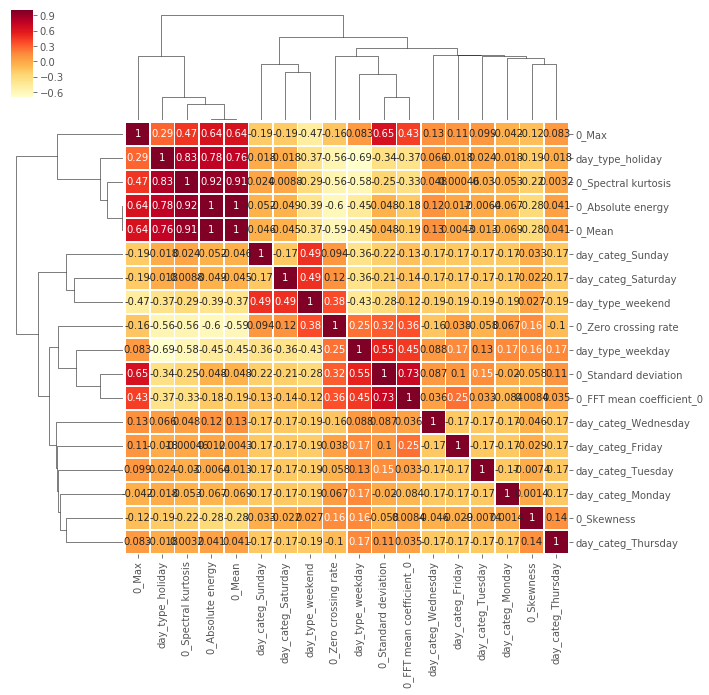

In [36]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr = df_dum.corr()

ax_ =sns.clustermap(corr,linewidth=0.5 ,cmap="YlOrRd",annot=True,annot_kws={"size": 10})

In [37]:
from sklearn.cluster import KMeans

In [38]:
# before clustering the values needing scaled 
import sklearn.preprocessing as preprocessing
df_scaled = preprocessing.scale(df_dum) 

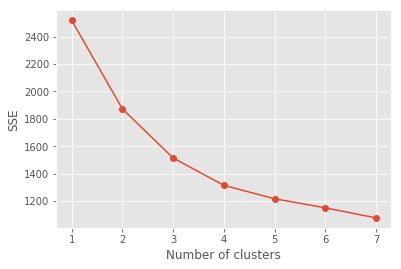

In [39]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 7
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [44]:
k_cluster = 3
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [45]:
# assign labels to original dataframe
df_label=df_clustering_ok.assign(label=kmeans_method.labels_)

In [78]:
df_gr1=df_label.loc[df_label.label==1]
df_gr1.groupby('day_categ').count()


,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_type,label
day_categ,,,,,,,,,,
Friday,5,5,5,5,5,5,5,5,5,5
Monday,8,8,8,8,8,8,8,8,8,8
Saturday,11,11,11,11,11,11,11,11,11,11
Sunday,11,11,11,11,11,11,11,11,11,11
Thursday,4,4,4,4,4,4,4,4,4,4
Tuesday,5,5,5,5,5,5,5,5,5,5
Wednesday,3,3,3,3,3,3,3,3,3,3


In [79]:
df_gr1.groupby('day_type').count()


,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,label
day_type,,,,,,,,,,
holiday,3,3,3,3,3,3,3,3,3,3
weekday,22,22,22,22,22,22,22,22,22,22
weekend,22,22,22,22,22,22,22,22,22,22


## Daily Clustering Starts from Here

In [100]:
df_hour = pd.read_sql_table('display_hourtsfel', 'sqlite:///dissertation.db')

In [101]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3360 non-null   int64  
 1   0_Absolute energy         3360 non-null   float64
 2   0_Mean                    3360 non-null   float64
 3   0_Max                     3360 non-null   float64
 4   0_Standard deviation      3360 non-null   float64
 5   0_FFT mean coefficient_0  3360 non-null   float64
 6   0_Spectral kurtosis       3360 non-null   float64
 7   0_Skewness                3360 non-null   float64
 8   0_Zero crossing rate      3360 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 236.4 KB


In [102]:
df_hour['time'] = pd.date_range(start="12/23/2019 00:00:00", end="05/10/2020 23:00:00", freq='H')

In [103]:
# prepare data for clustering
df_hour['weekofyear']=df_hour['time'].dt.week
df_hour['day_categ']=df_hour['time'].dt.day_name()
df_hour['day_num']=df_hour['time'].dt.weekday
df_hour['day']=df_hour['time'].dt.day
df_hour['hour']=df_hour['time'].dt.hour
df_hour['hour']=df_hour['hour'].astype('object')

df_hour['day_type'] = df_hour['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_hour.loc[(df_hour.time >= '2019-12-24 00:00:00') & (df_hour.time < '2019-12-26 00:00:00'), 'day_type']='holiday' #christmas
df_hour.loc[(df_hour.time >= '2020-01-01 00:00:00') & (df_hour.time < '2020-01-02 00:00:00'), 'day_type']='holiday' #new year
# lockdown week 13
df_hour.loc[(df_hour.weekofyear >12) & (df_hour.weekofyear <25), 'day_type'] = 'holiday'

In [104]:
df_hour_ok=df_hour.drop(['index','weekofyear','time','day','day_num'],axis=1)
df_hour_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   0_Zero crossing rate      3360 non-null   float64
 8   day_categ                 3360 non-null   object 
 9   hour                      3360 non-null   object 
 10  day_type                  3360 non-null   object 
dtypes: float64(8), object(3)
memory usage: 288.9+ KB


In [105]:
df_hour_dum = pd.get_dummies(df_hour_ok)
df_hour_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   0_Zero crossing rate      3360 non-null   float64
 8   day_categ_Friday          3360 non-null   uint8  
 9   day_categ_Monday          3360 non-null   uint8  
 10  day_categ_Saturday        3360 non-null   uint8  
 11  day_categ_Sunday          3360 non-null   uint8  
 12  day_categ_Thursday        3360 non-null   uint8  
 13  day_categ_Tuesday         3360 non-null   uint8  
 14  day_cate

In [106]:
df_hour_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ_Friday,day_categ_Monday,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.985732,0.939369,-0.194889,0.043866,0.066616,-0.009505,-0.575697,1.025406e-02,-5.778951e-02,...,4.088430e-02,-8.187224e-03,-3.505171e-02,-4.453255e-02,-4.757270e-02,-5.031990e-02,-5.063946e-02,6.701407e-01,-3.914266e-01,-3.326821e-01
0_Mean,0.985732,1.000000,0.948825,-0.223325,0.018873,0.098285,-0.011428,-0.585348,3.827961e-03,-6.179572e-02,...,3.735572e-02,6.146544e-03,-1.825991e-02,-2.911729e-02,-3.296926e-02,-3.155122e-02,-3.299967e-02,6.840909e-01,-4.040988e-01,-3.338289e-01
0_Max,0.939369,0.948825,1.000000,0.024685,0.136127,0.077996,0.039680,-0.358706,1.858003e-02,-5.093204e-02,...,4.430392e-02,1.710603e-02,-1.596172e-02,-3.099493e-02,-3.418218e-02,-3.779440e-02,-3.906930e-02,6.029906e-01,-3.597935e-01,-2.896527e-01
0_Standard deviation,-0.194889,-0.223325,0.024685,1.000000,0.475236,-0.073919,-0.002463,0.514869,5.051307e-02,3.077273e-02,...,2.616301e-02,4.389822e-02,2.805415e-02,-1.171907e-02,-2.652025e-02,-9.263822e-03,-2.197303e-02,-3.434077e-01,2.382699e-01,1.223416e-01
0_FFT mean coefficient_0,0.043866,0.018873,0.136127,0.475236,1.000000,-0.016699,-0.035711,0.058139,3.295493e-02,-1.639645e-02,...,1.545246e-02,-2.208782e-03,-7.188244e-03,-1.681939e-02,-1.672149e-02,-1.512647e-02,-1.857203e-02,-9.565864e-02,1.140032e-01,-2.676208e-02
0_Spectral kurtosis,0.066616,0.098285,0.077996,-0.073919,-0.016699,1.000000,-0.010837,-0.080778,-1.593806e-02,-2.902612e-02,...,9.398006e-02,2.068690e-03,5.409856e-03,-7.896191e-03,-1.038008e-03,5.409856e-03,-1.750937e-02,-8.289096e-02,7.686336e-02,4.813715e-03
0_Skewness,-0.009505,-0.011428,0.039680,-0.002463,-0.035711,-0.010837,1.000000,0.150731,2.188538e-02,9.165705e-03,...,-3.386228e-02,-2.451303e-02,-4.297685e-02,-2.599297e-02,-2.427734e-03,2.370981e-02,7.301461e-03,5.577045e-02,-6.618364e-02,1.524254e-02
0_Zero crossing rate,-0.575697,-0.585348,-0.358706,0.514869,0.058139,-0.080778,0.150731,1.000000,3.142189e-02,5.630858e-02,...,-2.415261e-02,-1.145927e-02,1.011942e-02,2.478728e-02,2.365898e-02,1.322223e-02,1.646609e-02,-4.727554e-01,2.078493e-01,3.219160e-01
day_categ_Friday,0.010254,0.003828,0.018580,0.050513,0.032955,-0.015938,0.021885,0.031422,1.000000e+00,-1.666667e-01,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01
day_categ_Monday,-0.057790,-0.061796,-0.050932,0.030773,-0.016396,-0.029026,0.009166,0.056309,-1.666667e-01,1.000000e+00,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01


<Figure size 2160x720 with 0 Axes>

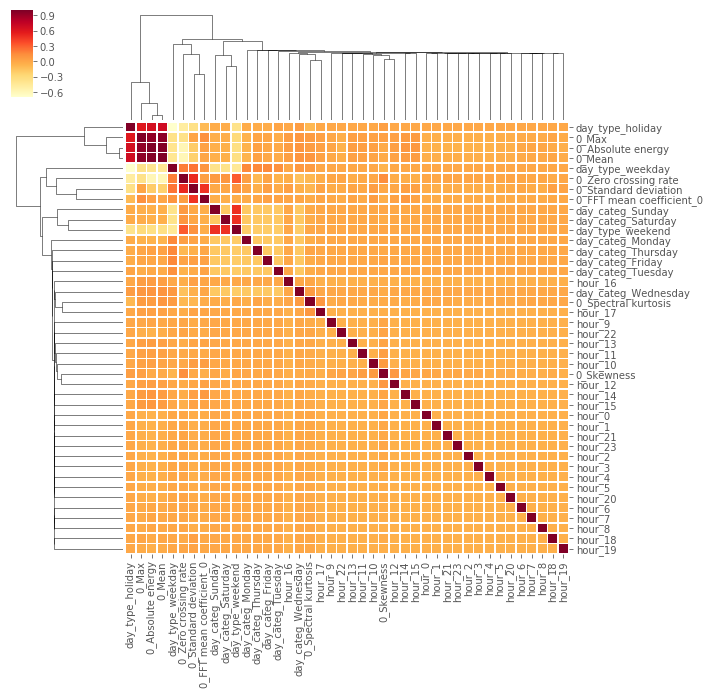

In [107]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr_hour = df_hour_dum.corr()

ax_ =sns.clustermap(corr_hour,linewidth=0.5 ,cmap="YlOrRd",annot=False,annot_kws={"size": 10})

In [108]:
df_hour_scaled = preprocessing.scale(df_hour_dum) 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


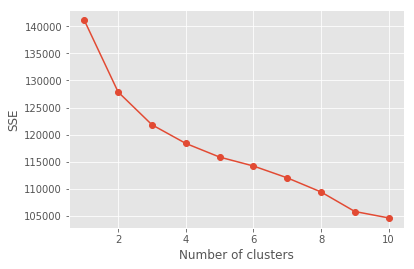

In [109]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k = 10
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

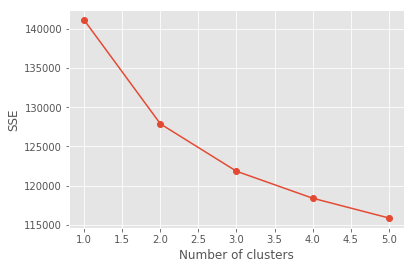

In [125]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k = 5
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [110]:
hour_k_cluster = 3
random_seed = 1
hour_kmeans_method = KMeans(n_clusters=hour_k_cluster,random_state=random_seed)
hour_kmeans_method.fit(df_hour_scaled)

KMeans(n_clusters=3, random_state=1)

In [111]:
df_hour_label=df_hour_ok.assign(label=hour_kmeans_method.labels_)

In [112]:
df_hour_gr1=df_hour_label.loc[df_hour_label.label==1]

In [113]:
df_hour_gr2=df_hour_label.loc[df_hour_label.label==0]

In [114]:
df_hour_gr3=df_hour_label.loc[df_hour_label.label==2]

In [126]:
pd.set_option('display.max_rows', None)

In [135]:
df_hour_label.loc[df_hour_label.label==1]

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,hour,day_type,label
0,0.196539,0.011019,0.058333,0.020604,3.043024e-05,2.435168,1.493913,21.0,Monday,0,weekday,1
1,0.036520,0.002230,0.059722,0.009822,9.924452e-09,1.898063,4.727973,22.0,Monday,1,weekday,1
2,0.105920,0.006485,0.059722,0.015880,1.889350e-07,2.384122,2.225933,25.0,Monday,2,weekday,1
3,0.164907,0.008418,0.061111,0.019678,2.905866e-05,2.469908,2.033612,24.0,Monday,3,weekday,1
4,0.197004,0.010413,0.061111,0.020948,2.460848e-05,2.405483,1.650723,25.0,Monday,4,weekday,1
5,0.053968,0.003237,0.061111,0.011808,4.195029e-07,2.051974,3.872444,30.0,Monday,5,weekday,1
6,0.041279,0.002704,0.059722,0.010361,7.312454e-08,2.046894,4.070546,25.0,Monday,6,weekday,1
7,0.106269,0.005725,0.061111,0.016199,1.893666e-05,2.225919,2.673655,25.0,Monday,7,weekday,1
8,0.201431,0.010224,0.059722,0.021331,2.700745e-05,2.241049,1.713141,27.0,Monday,8,weekday,1
9,0.044008,0.002886,0.061111,0.010673,2.588977e-07,2.050810,3.829652,27.0,Monday,9,weekday,1


In [157]:
df_hour_label.loc[(df_hour_label.label==2)&(df_hour_label.day_categ=='Wednesday')&(df_hour_label.day_type!='holiday')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 443 to 2135
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         67 non-null     float64
 1   0_Mean                    67 non-null     float64
 2   0_Max                     67 non-null     float64
 3   0_Standard deviation      67 non-null     float64
 4   0_FFT mean coefficient_0  67 non-null     float64
 5   0_Spectral kurtosis       67 non-null     float64
 6   0_Skewness                67 non-null     float64
 7   0_Zero crossing rate      67 non-null     float64
 8   day_categ                 67 non-null     object 
 9   hour                      67 non-null     object 
 10  day_type                  67 non-null     object 
 11  label                     67 non-null     int32  
dtypes: float64(8), int32(1), object(3)
memory usage: 6.5+ KB


In [158]:
df_hour_label.loc[(df_hour_label.label==2)]

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,hour,day_type,label
395,19.094346,0.230251,0.233333,4.942910e-03,5.926961e-08,1.326724e+01,-1.212220e+01,0.0,Wednesday,11,weekday,2
396,10.163302,0.166466,0.233333,2.281338e-02,5.532917e-05,1.527448e+01,2.462116e+00,0.0,Wednesday,12,weekday,2
397,9.025000,0.158333,0.158333,2.775558e-17,2.516548e-33,1.604407e+16,1.000000e+00,0.0,Wednesday,13,weekday,2
398,16.895210,0.215313,0.230556,2.390956e-02,4.482604e-05,2.153922e+01,-1.904427e+00,0.0,Wednesday,14,weekday,2
399,16.204134,0.211184,0.222222,2.031321e-02,4.517361e-06,1.788756e+01,-2.317874e+00,0.0,Wednesday,15,weekday,2
418,13.006906,0.186806,0.230556,3.512803e-02,4.133136e-06,1.399292e+01,3.940578e-01,0.0,Thursday,10,weekday,2
419,9.023686,0.158322,0.158333,1.262582e-04,1.036043e-15,2.567923e+02,-1.081704e+01,0.0,Thursday,11,weekday,2
420,9.022373,0.158310,0.158333,1.778043e-04,4.807162e-10,2.001476e+02,-7.550957e+00,0.0,Thursday,12,weekday,2
421,8.955642,0.157720,0.158333,1.102336e-03,2.836121e-08,8.914028e+01,-1.341802e+00,0.0,Thursday,13,weekday,2
422,8.737699,0.155791,0.158333,7.630603e-04,2.083748e-08,1.750118e+02,2.981745e+00,0.0,Thursday,14,weekday,2


In [128]:
df_hour_gr1.groupby(['day_type']).count()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,hour,label
day_type,,,,,,,,,,,
holiday,72,72,72,72,72,72,72,72,72,72,72
weekday,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079


In [140]:
df_hour_gr1.groupby(['hour']).count()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,day_type,label
hour,,,,,,,,,,,
0,53,53,53,53,53,53,53,53,53,53,53
1,53,53,53,53,53,53,53,53,53,53,53
2,53,53,53,53,53,53,53,53,53,53,53
3,53,53,53,53,53,53,53,53,53,53,53
4,53,53,53,53,53,53,53,53,53,53,53
5,53,53,53,53,53,53,53,53,53,53,53
6,53,53,53,53,53,53,53,53,53,53,53
7,53,53,53,53,53,53,53,53,53,53,53
8,53,53,53,53,53,53,53,53,53,53,53


In [150]:
df_hour_gr3.groupby(['day_categ']).count()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,hour,day_type,label
day_categ,,,,,,,,,,,
Friday,235,235,235,235,235,235,235,235,235,235,235
Monday,202,202,202,202,202,202,202,202,202,202,202
Saturday,178,178,178,178,178,178,178,178,178,178,178
Sunday,178,178,178,178,178,178,178,178,178,178,178
Thursday,264,264,264,264,264,264,264,264,264,264,264
Tuesday,233,233,233,233,233,233,233,233,233,233,233
Wednesday,315,315,315,315,315,315,315,315,315,315,315
